In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional
#import Sequential
#import os 

ModuleNotFoundError: No module named 'pandas'

In [2]:
! pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Predator\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
#os.listdir()

In [5]:
#! pip install nltk

In [6]:
#read = pd.read_csv("BBC News Train.csv")
read = pd.read_csv("final.csv")

NameError: name 'pd' is not defined

In [7]:
read.shape

NameError: name 'read' is not defined

In [68]:
read.tail(6)

,ArticleId,Text,Category
2219,1774,hyundai to build new india plant south korea s...,business
2220,857,double eviction from big brother model caprice...,entertainment
2221,325,dj double act revamp chart show dj duo jk and ...,entertainment
2222,1590,weak dollar hits reuters revenues at media gro...,business
2223,1587,apple ipod family expands market apple has exp...,tech
2224,538,santy worm makes unwelcome visit thousands of ...,tech


In [69]:
read.index

RangeIndex(start=0, stop=2225, step=1)

In [70]:
read.dropna(inplace=False)

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,business
3,459,india s reliance family feud heats up the ongo...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,politics
...,...,...,...
2220,857,double eviction from big brother model caprice...,entertainment
2221,325,dj double act revamp chart show dj duo jk and ...,entertainment
2222,1590,weak dollar hits reuters revenues at media gro...,business
2223,1587,apple ipod family expands market apple has exp...,tech


In [71]:
read.columns

Index(['ArticleId', 'Text', 'Category'], dtype='object')

In [3]:
read.info()

NameError: name 'read' is not defined

In [73]:
read.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [74]:
read["Category"].value_counts()

Category
sport            493
business         483
politics         421
entertainment    420
tech             408
Name: count, dtype: int64

<AxesSubplot:xlabel='Category'>

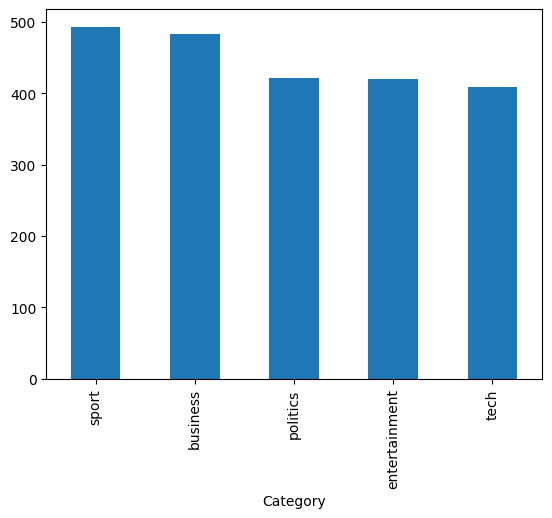

In [75]:
read["Category"].value_counts().plot.bar()

(array([1.784e+03, 4.140e+02, 1.800e+01, 2.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  501. ,  2999.2,  5497.4,  7995.6, 10493.8, 12992. , 15490.2,
        17988.4, 20486.6, 22984.8, 25483. ]),
 <BarContainer object of 10 artists>)

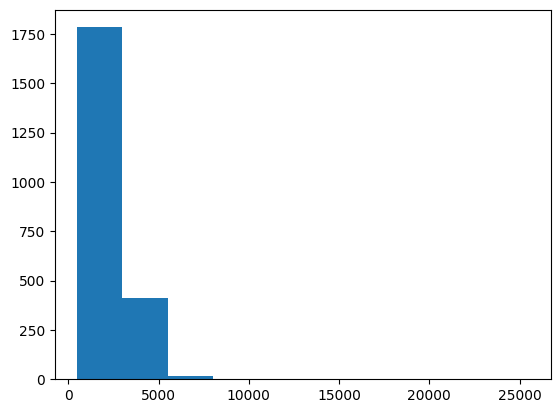

In [76]:
plt.hist(x=read['Text'].apply(len))

using one-hot **encoding**

In [77]:
#create insatnce
#encoder = OneHotEncoder(handle_unknown = "ignore")
#perform one hot encoding to Text column
#encoded_df = pd.DataFrame(encoder.fit_transform(read[['Category']]).toarray())
#perform one hot encoding to Category column
#encoded_df2 = pd.DataFrame(encoder.fit_transform(read[['Text']]).toarray())
#merge the above column with our original column
#read = read.join(encoded_df)
#final_df = read.join(encoded_df2)

Lets have balanced classes and do one-hot encoding

In [78]:
num_of_categories = 45000
shuffled = read.reindex(np.random.permutation(read.index))
#reindex our column
sport    = shuffled[shuffled['Category'] == 'sport'][:num_of_categories]
business = shuffled[shuffled['Category'] == 'business'][:num_of_categories]
politics = shuffled[shuffled['Category'] == 'politics'][:num_of_categories]
entertainment = shuffled[shuffled['Category'] == 'entertainment'][:num_of_categories]
tech = shuffled[shuffled['Category'] == 'tech'][:num_of_categories]
concated = pd.concat([sport,business,politics,entertainment,tech], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
#concatenate all dataframes
concated['LABEL'] = 0

In [79]:
concated.loc[concated['Category'] == 'sport', 'LABEL'] = 0
#selects data bylabel
concated.loc[concated['Category'] == 'business', 'LABEL'] = 1
concated.loc[concated['Category'] == 'politics', 'LABEL'] = 2
concated.loc[concated['Category'] == 'entertainment', 'LABEL'] = 3
concated.loc[concated['Category'] == 'tech', 'LABEL'] = 4
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=5)
print(labels[:10])
if 'Category' in concated.keys():
    concated.drop(['Category'], axis=1)

2116    4
461     0
1573    3
291     0
1494    3
365     0
1144    2
2119    4
1065    2
1744    3
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [80]:
labels

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [81]:
len(labels)

2225

In [82]:
read

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,business
3,459,india s reliance family feud heats up the ongo...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,politics
...,...,...,...
2220,857,double eviction from big brother model caprice...,entertainment
2221,325,dj double act revamp chart show dj duo jk and ...,entertainment
2222,1590,weak dollar hits reuters revenues at media gro...,business
2223,1587,apple ipod family expands market apple has exp...,tech


In [83]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/srijan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/srijan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
from nltk.corpus import stopwords

In [85]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [86]:
read.head(5)

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,business
3,459,india s reliance family feud heats up the ongo...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,politics


In [87]:
read['Text'].str.lower()
read.head(5)

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,business
3,459,india s reliance family feud heats up the ongo...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,politics


Tokenization

In [88]:
read['Token_text'] = read['Text'].apply(word_tokenize)
read.head()

,ArticleId,Text,Category,Token_text
0,1018,qpr keeper day heads for preston queens park r...,sport,"[qpr, keeper, day, heads, for, preston, queens..."
1,1319,software watching while you work software that...,tech,"[software, watching, while, you, work, softwar..."
2,1138,d arcy injury adds to ireland woe gordon d arc...,business,"[d, arcy, injury, adds, to, ireland, woe, gord..."
3,459,india s reliance family feud heats up the ongo...,entertainment,"[india, s, reliance, family, feud, heats, up, ..."
4,1020,boro suffer morrison injury blow middlesbrough...,politics,"[boro, suffer, morrison, injury, blow, middles..."


** Remove stopwords**

In [89]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [90]:
for sentence in read['Token_text']:
    for x in sentence:
        if x in stop_words:
            sentence.remove(x)

In [91]:
read.head(5)

,ArticleId,Text,Category,Token_text
0,1018,qpr keeper day heads for preston queens park r...,sport,"[qpr, keeper, day, heads, preston, queens, par..."
1,1319,software watching while you work software that...,tech,"[software, watching, work, software, monitor, ..."
2,1138,d arcy injury adds to ireland woe gordon d arc...,business,"[arcy, injury, adds, ireland, woe, gordon, arc..."
3,459,india s reliance family feud heats up the ongo...,entertainment,"[india, reliance, family, feud, heats, ongoing..."
4,1020,boro suffer morrison injury blow middlesbrough...,politics,"[boro, suffer, morrison, injury, blow, middles..."


In [92]:
read['Token_text_join'] = [' '.join(map(str, l)) for l in read['Token_text']]

In [93]:
read.head(5)

,ArticleId,Text,Category,Token_text,Token_text_join
0,1018,qpr keeper day heads for preston queens park r...,sport,"[qpr, keeper, day, heads, preston, queens, par...",qpr keeper day heads preston queens park range...
1,1319,software watching while you work software that...,tech,"[software, watching, work, software, monitor, ...",software watching work software monitor every ...
2,1138,d arcy injury adds to ireland woe gordon d arc...,business,"[arcy, injury, adds, ireland, woe, gordon, arc...",arcy injury adds ireland woe gordon arcy been ...
3,459,india s reliance family feud heats up the ongo...,entertainment,"[india, reliance, family, feud, heats, ongoing...",india reliance family feud heats ongoing publi...
4,1020,boro suffer morrison injury blow middlesbrough...,politics,"[boro, suffer, morrison, injury, blow, middles...",boro suffer morrison injury blow middlesbrough...


In [94]:
read.drop('Text', axis = 1, inplace = True)
read.drop('Token_text', axis=1, inplace = True)

In [95]:
read.head(5)

,ArticleId,Category,Token_text_join
0,1018,sport,qpr keeper day heads preston queens park range...
1,1319,tech,software watching work software monitor every ...
2,1138,business,arcy injury adds ireland woe gordon arcy been ...
3,459,entertainment,india reliance family feud heats ongoing publi...
4,1020,politics,boro suffer morrison injury blow middlesbrough...


In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le = LabelEncoder()

In [98]:
labels = le.fit_transform(read['Category'])

In [99]:
len(labels)

2225

(array([1.726e+03, 4.640e+02, 2.500e+01, 3.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  389. ,  2297.3,  4205.6,  6113.9,  8022.2,  9930.5, 11838.8,
        13747.1, 15655.4, 17563.7, 19472. ]),
 <BarContainer object of 10 artists>)

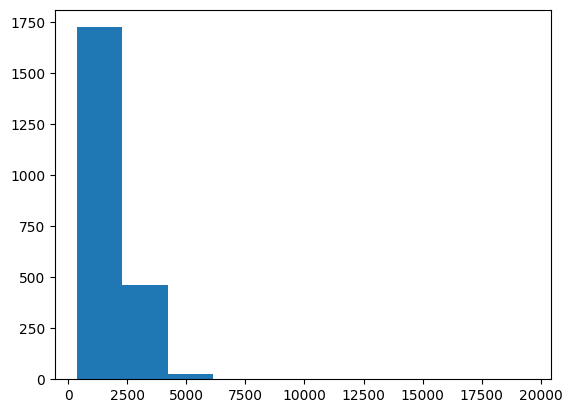

In [100]:
plt.hist(x=read['Token_text_join'].apply(len))

In [101]:
read['Category'].value_counts()

Category
sport            493
business         483
politics         421
entertainment    420
tech             408
Name: count, dtype: int64

**USING TFIDF **

In [102]:
transform = TfidfTransformer()
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [103]:
train_count = count_vectorizer.fit_transform(read['Token_text_join'].values)
train_tfidf = transform.fit_transform(train_count)
#len(train_tfidf)

In [120]:
x_train, x_test, y_train, y_test = train_test_split(train_tfidf,labels, train_size=0.7, random_state = 42)

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
Randomfc = RandomForestClassifier(n_estimators = 5, max_features='log2')
Randomfc.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=5)

In [123]:
Randomfc.score(x_test,y_test)

0.37425149700598803

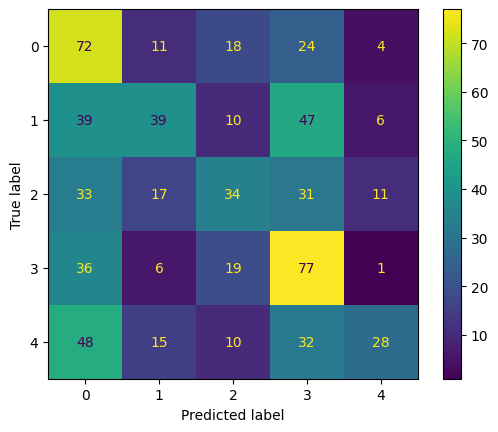

In [124]:
# Generate predictions with the best model
y_pred_first = Randomfc.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_first)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [125]:
print(classification_report(y_test, y_pred_first))

              precision    recall  f1-score   support

           0       0.32      0.56      0.40       129
           1       0.44      0.28      0.34       141
           2       0.37      0.27      0.31       126
           3       0.36      0.55      0.44       139
           4       0.56      0.21      0.31       133

    accuracy                           0.37       668
   macro avg       0.41      0.37      0.36       668
weighted avg       0.41      0.37      0.36       668



In [134]:
accuracy_score(y_test,y_pred_first)

0.37425149700598803

In [127]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [128]:
train_tfidf

<2225x388605 sparse matrix of type '<class 'numpy.float64'>'
	with 948934 stored elements in Compressed Sparse Row format>

In [129]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f357b31ba90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f3575ecf7c0>})

In [130]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 68}


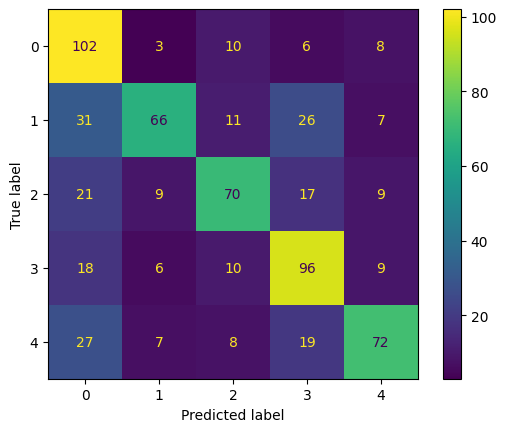

In [131]:
#Generate predictions with the best model
y_pred = best_rf.predict(x_test)

 #Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)


ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62       129
           1       0.73      0.47      0.57       141
           2       0.64      0.56      0.60       126
           3       0.59      0.69      0.63       139
           4       0.69      0.54      0.61       133

    accuracy                           0.61       668
   macro avg       0.63      0.61      0.61       668
weighted avg       0.63      0.61      0.60       668



In [133]:
accuracy_score(y_test,y_pred)

0.6077844311377245

In [ ]:
check = ["There were regional variations between the constituencies, with Altrincham and Sale West recording one of the lowest levels of confidence in the current political system, coming in at just 4.9%."]
ent = ["Best of Arijit Singhs 2023  Hindi Romantic Songs 2023  Arijit Singh Hits Songs  | Iztiraar Lofi"]
#fin = ["chinese developed a new mobile tech laptop device"]
vari = ["Shree is a football player"]
tokenizer = Tokenizer()
seq = tokenizer.texts_to_sequences(vari)
pred = best_rf.predict(transform.transform(count_vectorizer.transform(vari)))
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment'] #orig

ValueError: X has 164330 features, but RandomForestClassifier is expecting 281092 features as input.

In [ ]:
if pred == 0:
    print("Sports")
elif pred == 1:
    print("Business")
elif pred == 2:
    print("Politics")
elif pred == 3:
    print("Entertainment")
elif pred == 4:
    print("Tech")

Sports


using DNN **methods**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = 5000, oov_token='post')
tokenizer.fit_on_texts(read['Token_text_join'].values)
word_index = tokenizer.word_index

In [ ]:
len(word_index)

NameError: name 'word_index' is not defined

In [ ]:
first_entry = next(iter(word_index.items()))
print(first_entry)

('post', 1100)


In [ ]:
fifth_entry = list(word_index.items())[4]
print(fifth_entry)


('be', 5)


In [ ]:
en = list(word_index.items())[400]
print(en)


('men', 401)


In [ ]:
print('We have %s unique tokens.' % len(word_index))

We have 24981 unique tokens.


In [ ]:
sequences = tokenizer.texts_to_sequences(read['Token_text_join'].values)
len(sequences)

1490

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(sequences, maxlen=200)
len(X)

1490

In [ ]:
len(sequences)

1490

In [ ]:
len(X)

1490

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.8, random_state=42)

Create Model

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=len(word_index)+1, output_dim=50))
model.add(Dropout(0.5))
model.add(LSTM(units = 50))
model.add(Dense(6, activation='softmax'))

model.build(input_shape=(None,50))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          1249100   
                                                                 
 dropout_5 (Dropout)         (None, None, 50)          0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 6)                 306       
                                                                 
Total params: 1,269,606
Trainable params: 1,269,606
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/srijan/.pyenv/versions/3.8.0/envs/myenv/lib/python3.8/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6) are incompatible


In [ ]:
import pickle


In [ ]:

with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-07-09 22:37:05         2366
metadata.json                                  2023-07-09 22:37:05           64
variables.h5                                   2023-07-09 22:37:05      5098584


In [ ]:

# Load the model
with open('model_filename.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

2023-07-09 22:37:52.368782: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-09 22:37:52.368842: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-09 22:37:56.531642: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-09 22:37:56.531897: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-09 22:37:56.531927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-07-09 22:37:04         2366
metadata.json                                  2023-07-09 22:37:04           64
variables.h5                                   2023-07-09 22:37:04      5098584


2023-07-09 22:38:00.249721: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-09 22:38:00.249792: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-09 22:38:00.249834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (srijan-Latitude-6430U): /proc/driver/nvidia/version does not exist


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
